# **Analyzing Real Estate Trends in Melbourne, Australia**

Final CMSC320 Tutorial Project by Joyce Tijani and Cheyenne Montgomery

## **Part 1: Introduction**

### 1.1 Background Information 
For this tutorial, we will show you how to analyze real estate trends using python and it's libraries specifically working on data we found for Melbourne, Australia (Which the link for can be found below). While we will demostrate this tutorial on this specific dataset, the hope is that with a dataset with similar information presented and columns, you can analyze it in the same way! A home buyer or real estate agent may want to take special interest in this tutorial to insure that themselves and cilental are not getting cheated and are getting the best price possible. 
For the purposes of this tutorial, imagine you are a real estate agent!


### 1.2 Libraries Used

You will need the following libraries installed to complete our tutorial.

In [688]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Data Processing
3.1 Positional Breakdown
3.2 Positional Grouping
Exploratory Data Analysis
4.1 Attribute Categories
4.2 Correlation of Attributes for different positions
4.3 Understanding the correlation
Machine Learning & Visualization
5.1 Creation and Training of Model
5.2 Plotting to Observe Differences in Predicted and True Frequencies
Conclusion
6.1 Recap
6.2 Final Thoughts



## **Part 2: Data Collection**


### 2.1 About the Dataset

As stated above, we will be looking at a housing dataset specifically for Melbourne, Australia. This tutorial could possibly be ran on other datasets but this is dependent on the columns and information provided by it. 

### 2.2 Load and View Data

Optional: Download the csv from [Github](https://github.com/cheymonty/320-Final-Project/raw/main/melbourne_housing.csv)


In [689]:
url = "https://github.com/cheymonty/320-Final-Project/raw/main/melbourne_housing.csv"
df = pd.read_csv(url)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


### Variable Descriptions

 "Type" refers to the type of housing: [Reference](https://www.iqiglobal.com/blog/6-housing-types-and-what-are-the-differences-in-australia/)


*   h - House
*   u - Unit/Apartment
*   t - Townhouse





### 2.3 Cleaning up the Data
We will be renaming a couple columns for better readability
- Bedroom2 &#8594; Bedrooms
- Lattitude &#8594; Latitude
- Longtitude &#8594; Longitude
- Date &#8594; DateSold

We will also remove some columns as they are not important for our analysis
- SellerG
- Distance
- Propertycount
- Method

Lastly, we will change the DateSold column to be datetime objects instead of just strings

In [690]:
# renaming columns
df.rename(columns={'Bedroom2': 'Bedrooms', 'Lattitude': 'Latitude', 'Longtitude': 'Longitude', 'Date': 'DateSold'}, inplace=True)
# removing columns
df.drop(columns=["SellerG", "Distance", "Propertycount", "Method"], inplace=True)

# setting DateSold to be datetime objects
for row in df.itertuples():
  df.at[row.Index, 'DateSold'] = datetime.strptime(row.DateSold, '%d/%m/%Y').date()
df['DateSold'] = pd.to_datetime(df['DateSold'])

# sorting dataframe in ascending order by DateSold
df.sort_values(by="DateSold", inplace=True)

df.head()

,Suburb,Address,Rooms,Type,Price,DateSold,Postcode,Bedrooms,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname
6184,Surrey Hills,999A Riversdale Rd,3,h,1205000,2016-01-28,3127,3,1,2.0,490,NaN,NaN,Whitehorse,-37.8361,145.1006,Southern Metropolitan
6183,Surrey Hills,1/10 Florence Rd,2,u,813000,2016-01-28,3127,2,1,2.0,108,NaN,NaN,Whitehorse,-37.8276,145.1023,Southern Metropolitan
4029,Mont Albert,50/781 Whitehorse Rd,2,u,750000,2016-02-04,3127,2,2,2.0,0,80.0,2003.0,Whitehorse,-37.8161,145.1098,Eastern Metropolitan
7168,Ormond,7/30 Walsh St,1,u,250000,2016-02-04,3204,1,1,1.0,0,36.0,1960.0,Glen Eira,-37.9028,145.0475,Southern Metropolitan
4709,Port Melbourne,404/101 Bay St,2,u,550000,2016-02-04,3207,2,1,1.0,0,57.0,2012.0,Port Phillip,-37.8408,144.9400,Southern Metropolitan


## **Part 3: Analysis**
We are interested in the average monthly real estate price by housing type over time in Melbourne, Australia. We will create line plots to display this information. We will create three different dictionaries, one for each housing type. Iterating over the dataset, we will add to appropriate dictionary according to housing type. Afterwords we will calculate the average for each type as well. Each dict will have key = month-year and value = [total price, count]. Keeping track of the total price and count will allow us to calculate the average price during each month.

<!-- First, we need to group all the data from the same month and year together. -->

Now why would we be interested in this? 
By looking at the plots, we could look at pricing trends over time based of the type of housing it is to determine whether or not it may be a good time to purchase a home or not. This will help you insure that your clients aren’t getting cheated and are getting the best price possible. If a client comes around a home they are interested in, they can come compare to the average price during that time to see whether or not it is a deal, within the average, or may be a rip off.

In [691]:
HMap = {}
UMap = {}
TMap = {}

for row in df.itertuples():
  key = str(row.DateSold.month) + "-" + str(row.DateSold.year)

  if row.Type == "h":
    if key in HMap:
      vals = HMap[key]

      total = vals[0]
      total += row.Price

      count = vals[1]
      count += 1

      HMap[key] = [total, count]
    else:
      HMap[key] = [row.Price, 1]
  elif row.Type == "u":
      if key in UMap:
        vals = UMap[key]

        total = vals[0]
        total += row.Price

        count = vals[1]
        count += 1

        UMap[key] = [total, count]
      else:
        UMap[key] = [row.Price, 1]
  else:
      if key in TMap:
        vals = TMap[key]

        total = vals[0]
        total += row.Price

        count = vals[1]
        count += 1

        TMap[key] = [total, count]
      else:
        TMap[key] = [row.Price, 1]


HAvgs = []
for vals in HMap.values():
  HAvgs.append(vals[0] / vals[1])

UAvgs = []
for vals in UMap.values():
  UAvgs.append(vals[0] / vals[1])

TAvgs = []
for vals in TMap.values():
  TAvgs.append(vals[0] / vals[1])

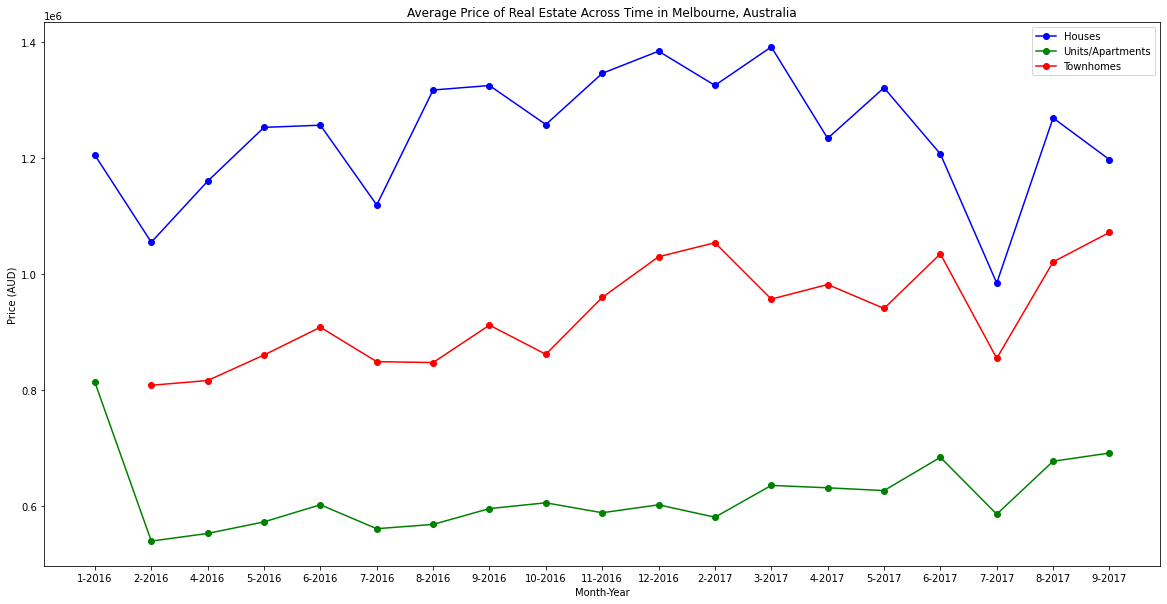

In [692]:
plt.figure(figsize=(20,10))
plt.plot(list(HMap.keys()), HAvgs, marker='o', color="blue", label="Houses")
plt.plot(list(UMap.keys()), UAvgs, marker='o', color="green", label="Units/Apartments")
plt.plot(list(TMap.keys()), TAvgs, marker='o', color="red", label="Townhomes")
plt.xlabel("Month-Year")
plt.ylabel("Price (AUD)")
plt.title("Average Price of Real Estate Across Time in Melbourne, Australia")
plt.legend()
plt.show()

This graph shows that overall, houses have continued to have the highest average cost and prices have fluctuated minimally over the months.
Just by looking at this graph, it might be tempting to say that in 7-2017, the prices of housing was really low. But really, 7-2017 has more data points than the other month-years.


#HeatMaps

Let’s say your client is interested in living in the most expensive area! Next in the tutorial we can find the area that has the most expensive listings for each housing type!
First we calculated the total average for each type of housing which is the mean of the monthly averages we already calculated. We characterized “expensive” homes to be the ones equal and above that total average for the dataset and plotted them on a geographical map according to the longitude and latitude. The plots we developed were split by housing type.


In [693]:
total_house_avg = np.mean(HAvgs)
total_unit_avg = np.mean(UAvgs)
total_townhome_avg = np.mean(TAvgs)

expensive_houses = df[(df["Type"] == "h") & (df["Price"] >= total_house_avg)]
expensive_units = df[(df["Type"] == "u") & (df["Price"] >= total_unit_avg)]
expensive_townhomes = df[(df["Type"] == "t") & (df["Price"] >= total_townhome_avg)]

##Expensive Houses Heat Map

In [694]:
house_map_osm = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
heat = [[row.Latitude, row.Longitude] for row in expensive_houses.itertuples()]
HeatMap(heat, radius=25).add_to(house_map_osm)
house_map_osm

##Expensive Apartments Heat Maps

In [695]:
unit_map_osm = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
heat = [[row.Latitude, row.Longitude] for row in expensive_units.itertuples()]
HeatMap(heat, radius=20).add_to(unit_map_osm)
unit_map_osm

## Expensive Townhome Heat Map

In [696]:
townhome_map_osm = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
heat = [[row.Latitude, row.Longitude] for row in expensive_townhomes.itertuples()]
HeatMap(heat, radius=20).add_to(townhome_map_osm)
townhome_map_osm

## Next, we can look at the areas with the “cheapest” homes which we determined to be those below the average. 

In [697]:
cheaper_houses = df[(df["Type"] == "h") & (df["Price"] < total_house_avg)]
cheaper_units = df[(df["Type"] == "u") & (df["Price"] < total_unit_avg)]
cheaper_townhomes = df[(df["Type"] == "t") & (df["Price"] < total_townhome_avg)]

##Cheaper House Heap Map

In [698]:
house_map_osm = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
heat = [[row.Latitude, row.Longitude] for row in cheaper_houses.itertuples()]
HeatMap(heat, radius=20).add_to(house_map_osm)
house_map_osm

#Cheaper Apartment Heat Map

In [699]:
unit_map_osm = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
heat = [[row.Latitude, row.Longitude] for row in cheaper_units.itertuples()]
HeatMap(heat, radius=20).add_to(unit_map_osm)
unit_map_osm

# Cheaper Townhome Heat Map

In [700]:
townhome_map_osm = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
heat = [[row.Latitude, row.Longitude] for row in cheaper_townhomes.itertuples()]
HeatMap(heat, radius=20).add_to(townhome_map_osm)
townhome_map_osm

At a quick glance, the expensive housing heat maps show that for all three housing types, the most expensive housing is along the coast.
For the cheaper housing, most are situated around the city of Melbourne, and not in the city itself. These trends are almost always found in cities and are to be expected.

##Follow Up Idea!
Instead of using the average price per housing as a seperator between expensive and cheap, maybe put in your own numbers for your own budget to see what part of Melbourne your client can afford.

With everything you have seen, you might start asking hard hitting questions like, “If I get a older home, is it possible for me to get a cheaper price?” Now don’t sweat, we’ll cover that next!



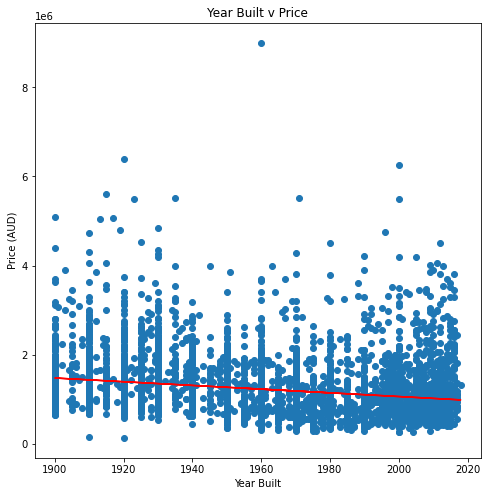

In [701]:
dataframe = df[(~df["YearBuilt"].isnull()) & (df["YearBuilt"] >= 1900) & (df["Type"] == "h")]
x = np.array(list(dataframe["YearBuilt"]))
y = dataframe.Price


m,b = np.polyfit(x, y, deg=1)
plt.figure(figsize=(8,8))
plt.title('Year Built v Price')
plt.ylabel('Price (AUD)')
plt.xlabel('Year Built')
plt.plot(x, m * x + b, color='red')
plt.scatter(x, y)
plt.show()

In actuality, the newer the housing was built, the cheaper it will be. The data shows us this trend but given just the dataset, there is no clear reason why. Part of data analysis is putting together mulitple pieces of data, and if you are interested in why older homes sell for less, we encourge you to research it!

# Correlation Heat Map

In the previous plot, we showed that there was a negative correlation between the Year Built and the price of the home. This heat map further confirmed this and we are now interested in the correlations between all variables of a listing.

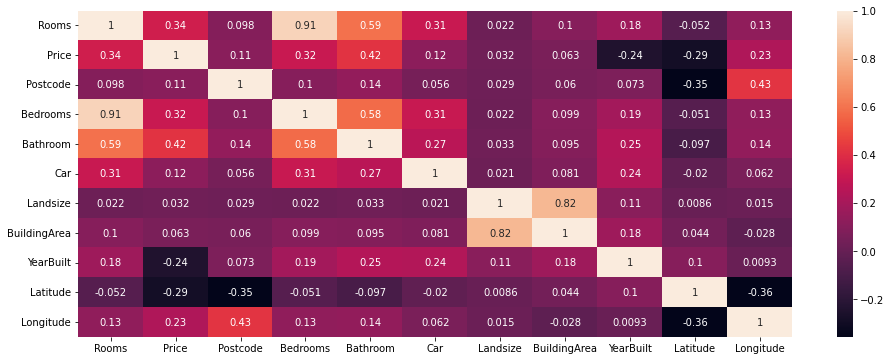

In [702]:
temp_df = df[df["Type"] == "h"]
plt.figure(figsize=(16, 6))
sns.heatmap(temp_df.corr(), annot=True)
plt.show()

In this example, we focused on a House type of listing and found that there was actually not a lot of correlation between any 2 unique variables. A real estate agent may find this important to note to their client if they ask questions regarding the ability to get the home and features they desire. 
For example, between bedrooms and price and bathrooms and price, there is a positive correlation but not a strong correlation between the 2. This could provide hope and comfort to buyers who may think more bedrooms or bathrooms are out of their reach due to their budgets.

#Conclusion

Being a real estate agent isn't always easy. Following and tracking trends can be daunting and intimidating but hopefully this tutorial gives you as a real estate agent, more confidence on how to do so. Data Analysis is not always cut and dry but with following the data lifestyle, the answers to the questions you seek are always 1 to 10000 lines of code away!